## Detecting malaria using convolutional neural network


The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


#### Save humans by detecting and deploying Image Cells that contain Malaria or not!

https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [3]:
!pip install -q xlrd
!git clone https://github.com/jwcunhagit/machinelearning.git

Cloning into 'machinelearning'...
remote: Enumerating objects: 37850, done.
remote: Counting objects: 100% (10240/10240), done.
remote: Compressing objects: 100% (10162/10162), done.
remote: Total 37850 (delta 82), reused 10228 (delta 75), pack-reused 27610
Receiving objects: 100% (37850/37850), 307.01 MiB | 36.55 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (37814/37814), done.


In [4]:
#importing libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [5]:
# initialising the CNN
classifier = Sequential()

In [6]:
#step 1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape= (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#2nd layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#step 3 - Flattening
classifier.add(Flatten())

#step-4 Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))


In [7]:
# compile the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/valid',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [17]:
classifier.fit(training_set,
               steps_per_epoch = 80,
               epochs = 25,
               validation_data = test_set,
               validation_steps = 2000)

Epoch 1/25
80/80 [==============================] - 7s 92ms/step - loss: 0.5458 - accuracy: 0.7125 - val_loss: 0.5312 - val_accuracy: 0.7358
Epoch 2/25
80/80 [==============================] - 7s 92ms/step - loss: 0.5589 - accuracy: 0.7043 - val_loss: 0.5720 - val_accuracy: 0.7014
Epoch 3/25
80/80 [==============================] - 7s 91ms/step - loss: 0.5645 - accuracy: 0.6824 - val_loss: 0.5320 - val_accuracy: 0.7388
Epoch 4/25
80/80 [==============================] - 7s 91ms/step - loss: 0.5474 - accuracy: 0.7102 - val_loss: 0.5411 - val_accuracy: 0.7173
Epoch 5/25
80/80 [==============================] - 7s 92ms/step - loss: 0.5609 - accuracy: 0.7000 - val_loss: 0.5373 - val_accuracy: 0.7175
Epoch 6/25
80/80 [==============================] - 7s 91ms/step - loss: 0.5459 - accuracy: 0.7148 - val_loss: 0.5168 - val_accuracy: 0.7438
Epoch 7/25
80/80 [==============================] - 7s 92ms/step - loss: 0.5486 - accuracy: 0.7240 - val_loss: 0.5228 - val_accuracy: 0.7371
Epoch 8/25
80

In [24]:
import matplotlib.pyplot as plt

Not infected


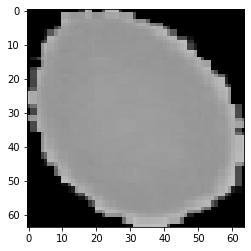

In [23]:
#test a new single image
test_image1= image.load_img('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/random1.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


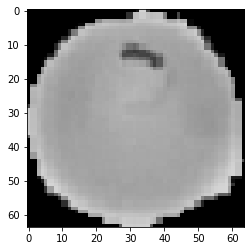

In [25]:
#test a new single image
test_image1= image.load_img('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/random2.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Not infected


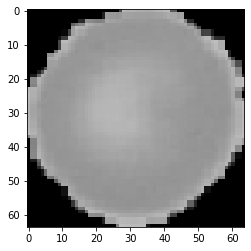

In [26]:
#test a new single image
test_image1= image.load_img('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/random3.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


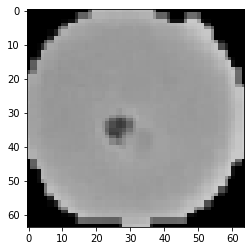

In [27]:
#test a new single image
test_image1= image.load_img('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/random4.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


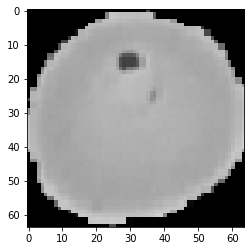

In [29]:
#test a new single image
test_image1= image.load_img('machinelearning/Real World DS and ML Projects/P2-Malaria-Detection/cell_images/random5.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)